In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [2]:
data = np.loadtxt('windowed_data.txt', delimiter=' ').reshape(-1, 3, 2)

In [3]:
print(data.shape)

(1439, 3, 2)


In [4]:
windows = np.load('windows.npy')
print(windows.shape)

(1439, 3, 2)


In [5]:
T_rms = np.loadtxt('data_rms.txt')
print(T_rms)
print(T_rms.shape)
T_window = np.loadtxt('windowed_data.txt')
print(T_window.shape)

[[0.0000000e+00 0.0000000e+00]
 [5.1000000e-02 0.0000000e+00]
 [1.0100000e-01 0.0000000e+00]
 ...
 [7.4850998e+01 0.0000000e+00]
 [7.4902000e+01 0.0000000e+00]
 [7.4953003e+01 0.0000000e+00]]
(1441, 2)
(4317, 2)


In [6]:
clas = np.loadtxt('Classes.txt')

In [7]:
print(clas.shape)

(1439,)


In [8]:
print(clas)

[0. 0. 0. ... 7. 7. 7.]


In [9]:
labels = np.load('labels.npy')

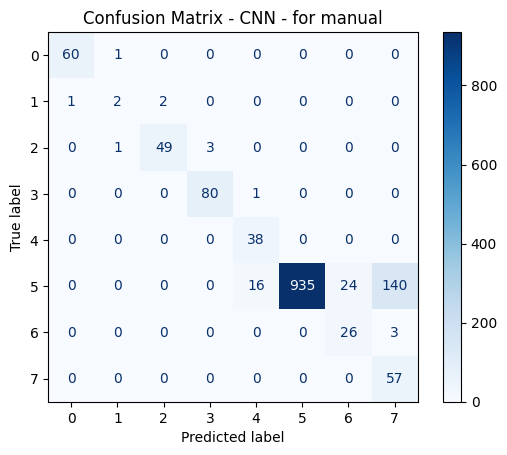

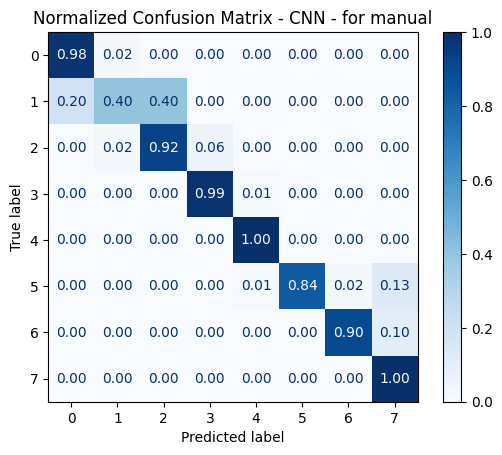

In [10]:
cm = confusion_matrix(labels, clas, labels=np.arange(8))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(8))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - CNN - for manual")
plt.show()

cm = confusion_matrix(labels, clas, labels=np.arange(8))

row_sum = cm.sum(axis=1, keepdims=True)
row_sum[row_sum == 0] = 1

cm_normalized = cm.astype('float') / row_sum

disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=np.arange(8))
disp.plot(cmap=plt.cm.Blues, values_format=".2f")  # shows values with 2 decimal places
plt.title("Normalized Confusion Matrix - CNN - for manual")
plt.savefig("ConfMat_PFR.pdf", dpi=1000)
plt.show()